In [16]:
from __future__ import division

In [17]:
%matplotlib inline
%autoreload 2

In [18]:
import matplotlib.pyplot as plt 

In [19]:
import sys
sys.path.append("../")

In [20]:
import get_gal_centroids as get_gal
from compare_peak_methods import draw_gaussian
from plot_gal_prop import plot_cf_contour
import compare_peak_methods as compare
from compare_peak_methods import one_big_gaussian_one_small_gaussian as \
    bimodal_gaussian

In [21]:
from get_gal_centroids import shrinking_apert 

# compare the confidence regions of different methods

In [37]:
bootNo = 50
data_size = 100

In [ ]:
gauss_data, shrink_peak_dens, KDE_peak_dens, cent_peak_dens = \
    compare.call_gaussian_and_prepare_data(data_size=data_size, bootNo=bootNo)

In [ ]:
compare.plot_gauss_comparison(gauss_data, shrink_peak_dens, KDE_peak_dens,
                              cent_peak_dens)

# Test 2 - one big gaussian, one small close-by gaussian

In [35]:
bimodal_data, shrink_peak1, KDE_peak_dens1, cent_peak_dens1 = \
    compare.call_one_big_one_small_gaussian(data_size=data_size, bootNo=bootNo)

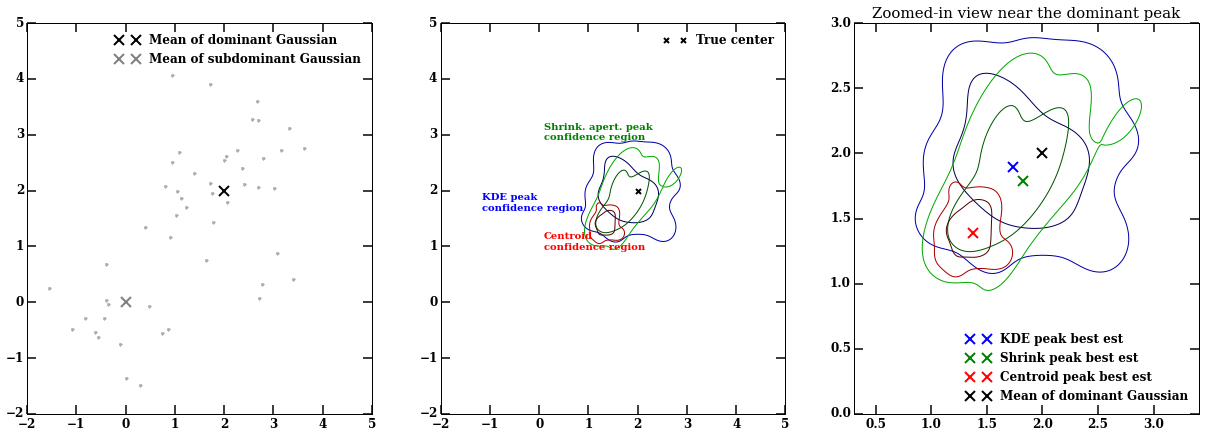

In [36]:
compare.plot_one_big_one_small_gaussian(
    bimodal_data, shrink_peak1, KDE_peak_dens1, cent_peak_dens1)

## shrinking aperture estimates

In [24]:
shrink_peaks = np.array([shrinking_apert(bi_data) 
                        for bi_data in bimodal_data[:20]])
shrink_peak_dens1 = get_gal.do_KDE(shrink_peaks)
shrink_peak_dens1 = get_gal.convert_fhat_to_dict(shrink_peak_dens1)
get_gal.find_peaks_from_py_diff(shrink_peak_dens1)

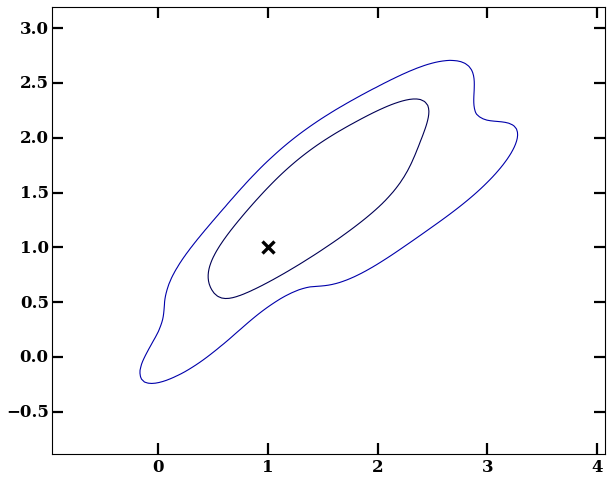

In [25]:
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens1["estimate"],
                shrink_peak_dens1["eval_points"][0],
                shrink_peak_dens1["eval_points"][1],
                colors=b_colors)
plt.plot(1, 1, "kx", mew=3, label="True center", markersize=10)

## compute the confidence region for the KDE 

In [20]:
KDE_fhat1 = [get_gal.do_KDE_and_get_peaks(g_data) 
             for g_data in bimodal_data[:20]]
KDE_peaks1 = np.array([np.array([fhat1["peaks_xcoords"][0], 
                                 fhat1["peaks_ycoords"][0]]) 
                       for fhat1 in KDE_fhat1])

In [21]:
KDE_peak_dens1 = get_gal.do_KDE(KDE_peaks1)
KDE_peak_dens1 = get_gal.convert_fhat_to_dict(KDE_peak_dens1)
get_gal.find_peaks_from_py_diff(KDE_peak_dens1)

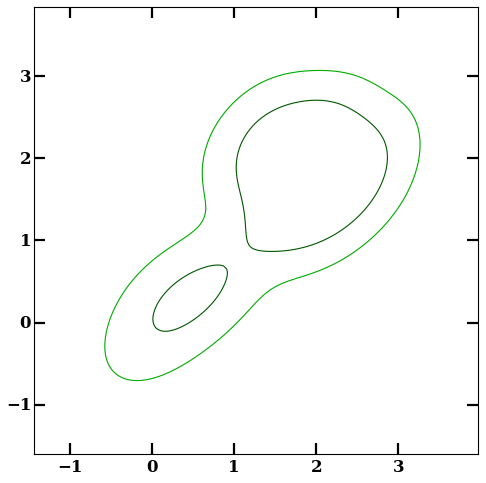

In [22]:
plt.axes().set_aspect('equal')
plot_cf_contour(KDE_peak_dens1["estimate"],
                KDE_peak_dens1["eval_points"][0],
                KDE_peak_dens1["eval_points"][1],
                colors=g_colors)

## compute confidence regions for centroids 

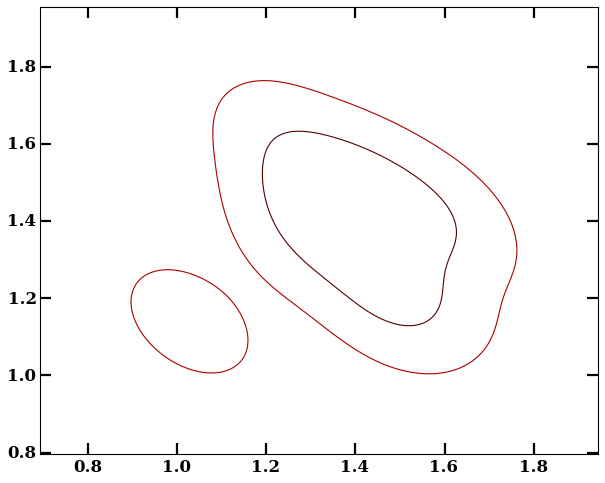

In [17]:
cent_fhat1 = [get_gal.compute_weighted_centroids(g_data) 
             for g_data in bimodal_data]
cent_peak_dens1 = get_gal.do_KDE(cent_fhat1)
cent_peak_dens1 = get_gal.convert_fhat_to_dict(cent_peak_dens1)
get_gal.find_peaks_from_py_diff(cent_peak_dens1)
plot_cf_contour(cent_peak_dens1["estimate"],
                cent_peak_dens1["eval_points"][0],
                cent_peak_dens1["eval_points"][1],
                colors=r_colors)

## combine all the contours

/Users/karenyng/Documents/Illustris_analysis/IEnv/lib/python2.7/site-packages/matplotlib/text.py:1788: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


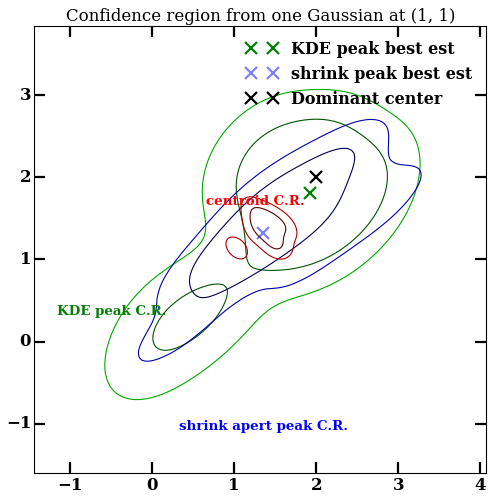

In [26]:
plt.axes().set_aspect('equal')
plot_cf_contour(KDE_peak_dens1["estimate"],
                KDE_peak_dens1["eval_points"][0],
                KDE_peak_dens1["eval_points"][1],
                colors=g_colors)
plt.plot(KDE_peak_dens1["peaks_xcoords"][0],
         KDE_peak_dens1["peaks_ycoords"][0],
         'gx', mew=2, markersize=10,
         label="KDE peak best est")
plt.figtext(0.23, 0.4, 'KDE peak C.R.', color='g')
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens1["estimate"],
                shrink_peak_dens1["eval_points"][0],
                shrink_peak_dens1["eval_points"][1],
                colors=b_colors)
plt.plot(shrink_peak_dens1["peaks_xcoords"][0],
         shrink_peak_dens1["peaks_ycoords"][0],
         'bx', mew=2, markersize=10, alpha=0.5,
         label="shrink peak best est")
plt.figtext(0.4, 0.2, 'shrink apert peak C.R.', 
            color='b')

plot_cf_contour(cent_peak_dens1["estimate"],
                cent_peak_dens1["eval_points"][0],
                cent_peak_dens1["eval_points"][1],
                colors=r_colors)

plt.annotate('centroid C.R.', (0.38, 0.6), 
             textcoords='axes fraction',
             color='r')
plt.plot(2, 2, "kx", mew=2, label="Dominant center", markersize=10,
        fillstyle='none')
plt.legend(loc='best', frameon=False)
plt.title('Confidence region from one Gaussian at (1, 1)',
          fontsize=15) 

# dumbbell data

In [126]:
bootNo = 20

In [127]:
dumb_data = [compare.dumbbell_data(data_size=data_size) 
             for i in range(bootNo)]

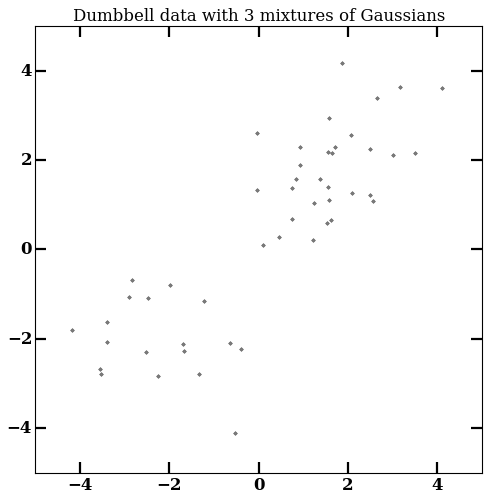

In [128]:
plt.axes().set_aspect('equal')
plt.plot(dumb_data[0][:, 0], dumb_data[0][:, 1], 'k.',
         alpha=0.5)
plt.title("Dumbbell data with 3 mixtures of Gaussians", size=15)

## shrinking aperture data 

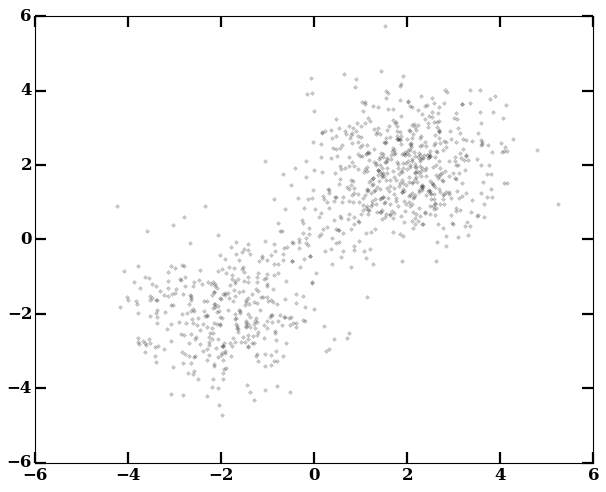

In [129]:
plt.plot(np.vstack(dumb_data)[:, 0],
         np.vstack(dumb_data)[:, 1], 'k.', alpha=0.2)

In [130]:
shrink_peaks2 = np.array([shrinking_apert(bi_data) 
                        for bi_data in dumb_data])
shrink_peak_dens2 = get_gal.do_KDE(shrink_peaks2)
shrink_peak_dens2 = get_gal.convert_fhat_to_dict(shrink_peak_dens2)
get_gal.find_peaks_from_py_diff(shrink_peak_dens2)

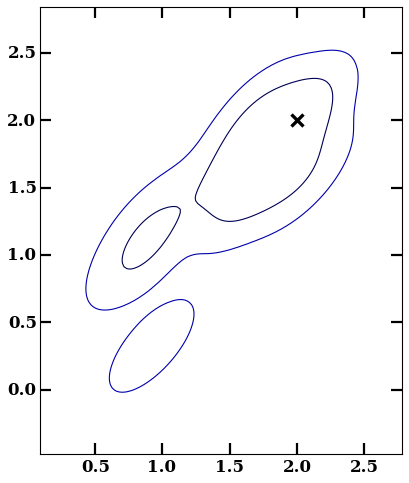

In [133]:
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens2["estimate"],
                shrink_peak_dens2["eval_points"][0],
                shrink_peak_dens2["eval_points"][1],
                colors=b_colors)
plt.plot(2, 2, "kx", mew=3, label="True center", markersize=10)

## KDE data 

In [134]:
KDE_fhat2 = [get_gal.do_KDE_and_get_peaks(g_data) 
             for g_data in dumb_data]
# this grabs the first dominant peak
KDE_peaks2 = np.array([np.array([fhat2["peaks_xcoords"][0], 
                                 fhat2["peaks_ycoords"][0]]) 
                       for fhat2 in KDE_fhat2])

In [135]:
# this grabs the subdominant peak 
KDE_peaks2b = np.array([np.array([fhat2["peaks_xcoords"][1], 
                                  fhat2["peaks_ycoords"][1]]) 
                        for fhat2 in KDE_fhat2])
KDE_peak_dens2b = get_gal.do_KDE(KDE_peaks2b)
KDE_peak_dens2b = get_gal.convert_fhat_to_dict(KDE_peak_dens2b)
get_gal.find_peaks_from_py_diff(KDE_peak_dens2b)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
KDE_peak_dens2 = get_gal.do_KDE(KDE_peaks2)
KDE_peak_dens2 = get_gal.convert_fhat_to_dict(KDE_peak_dens2)
get_gal.find_peaks_from_py_diff(KDE_peak_dens2)
plt.axes().set_aspect('equal')
plot_cf_contour(KDE_peak_dens2b["estimate"],
                KDE_peak_dens2b["eval_points"][0],
                KDE_peak_dens2b["eval_points"][1],
                colors=g_colors)
plt.plot(1, 1, "kx", mew=3, label="True center", markersize=10)
plt.

In [ ]:
plt.axes().set_aspect('equal')
plot_cf_contour(KDE_peak_dens2["estimate"],
                KDE_peak_dens2["eval_points"][0],
                KDE_peak_dens2["eval_points"][1],
                colors=g_colors)
plt.plot(1, 1, "kx", mew=3, label="True center", markersize=10)

## centroid 

In [ ]:
cent_fhat2 = [get_gal.compute_weighted_centroids(g_data) 
             for g_data in dumb_data]
cent_peak_dens2 = get_gal.do_KDE(cent_fhat2)
cent_peak_dens2 = get_gal.convert_fhat_to_dict(cent_peak_dens2)
get_gal.find_peaks_from_py_diff(cent_peak_dens2)
plot_cf_contour(cent_peak_dens2["estimate"],
                cent_peak_dens2["eval_points"][0],
                cent_peak_dens2["eval_points"][1],
                colors=r_colors)

## combined contours

In [ ]:
plt.axes().set_aspect('equal')
plot_cf_contour(KDE_peak_dens2["estimate"],
                KDE_peak_dens2["eval_points"][0],
                KDE_peak_dens2["eval_points"][1],
                colors=g_colors)

plt.plot(KDE_peak_dens2["peaks_xcoords"][0],
         KDE_peak_dens2["peaks_ycoords"][0],
         'go', mew=2, markersize=10, fillstyle='none',
         label="KDE peak best est")
plt.figtext(0.6, 0.85, 'KDE peak C.R.', color='g')
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens2["estimate"],
                shrink_peak_dens2["eval_points"][0],
                shrink_peak_dens2["eval_points"][1],
                colors=b_colors)
plt.plot(shrink_peak_dens2["peaks_xcoords"][0],
         shrink_peak_dens2["peaks_ycoords"][0],
         'bx', mew=2, markersize=10,
         label="shrink peak best est")
plt.figtext(0.35, 0.7, 'shrink apert peak C.R.', 
            color='b')

plot_cf_contour(cent_peak_dens2["estimate"],
                cent_peak_dens2["eval_points"][0],
                cent_peak_dens2["eval_points"][1],
                colors=r_colors)

plt.figtext(0.35, 0.58, 'centroid C.R.', 
            color='r')
plt.plot(2, 2, "kx", mew=2, label="Dominant center", 
         markersize=10)
plt.plot(-2, -2, "x", color="grey", mew=3, label="Subdominant center", 
         markersize=10)
plt.plot(0, 0, "x", color="grey", mew=3, label="Subdominant center", 
         markersize=10)
plt.legend(loc='lower right', frameon=False)
plt.xlim(-2.5, 3)
plt.ylim(-2.5, 3)

plt.title('Confidence region from dominant Gaussian at (2, 2)',
          fontsize=15) 
plot_cf_contour(KDE_peak_dens2b["estimate"],
                KDE_peak_dens2b["eval_points"][0],
                KDE_peak_dens2b["eval_points"][1],
                colors=g_colors)
plt.ylim((-3.5, 3.5))
plt.xlim((-3., 3))
plt.savefig("../../paper/confidence_regions_500.eps", bbox_inches='tight')

The shrinking aperture estimates are elongated towards where the second data clump. 

In [ ]:
compare.plot_dumbbell_50_comparison(
    dumb_data, shrink_peak_dens2, KDE_peak_dens2,
    KDE_peak_dens2b, cent_peak_dens2)

In [ ]:
dumb_data, shrink_peak_dens2, KDE_peak_dens2, KDE_peak_dens2b, cent_peak_dens2 = \
    compare.call_dumbbell_example_and_prepare_data(data_size=50, bootNo=20)